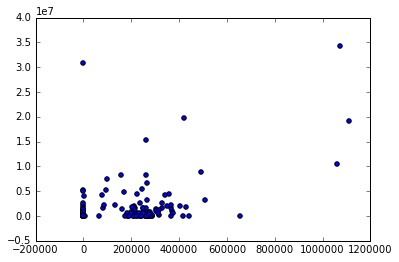

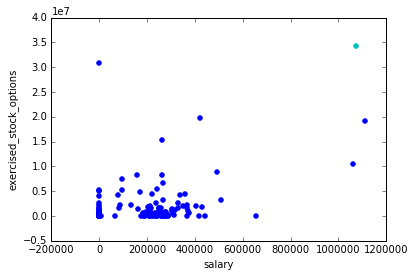

In [1]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

%matplotlib inline


import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn import cluster



def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

clf =  cluster.KMeans(2)
clf.fit(finance_features)
pred = clf.predict(finance_features)
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
for f1, f2, f3 in finance_features:
### (as it's currently written, the line below assumes 2 features)
### for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [2]:
import pandas as pd
df = pd.DataFrame(data_dict).T
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [3]:
print df.exercised_stock_options.min()
print df.exercised_stock_options.max()

3285
NaN


In [13]:
import numpy as np
print df.shape[0]
df_2 = df[df.salary != 'NaN']
df_2.salary = df_2.salary.astype(float)
#print df.shape[0]

145


In [5]:
df_2.salary.min()

477

In [6]:
df_2.salary.max()

1111258

In [24]:
import sklearn.preprocessing as preprocessing

clf = preprocessing.MinMaxScaler()
df_2['salary_rescaled'] = clf.fit_transform(df_2.salary)
#df_2['salary_rescaled_reshape'] = df_2.salary.reshape(0,1)

df_2[df_2.salary > 200000]

/home/miruna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/miruna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/miruna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,salary_rescaled
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,0.181384
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258,0.240034
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,69,False,145796,-82782,239671,NaN,NaN,827696,63014,0.215339
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,566,False,126027,NaN,231330,2639,7315,969068,126027,0.207829
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,210698,True,157569,NaN,213999,5521,7991,5501630,1110705,0.192227
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616,0.194552
BIBI PHILIPPE A,1000000,NaN,NaN,NaN,philippe.bibi@enron.com,1465734,38559,40,23,8,...,425688,False,378082,NaN,213625,1336,1607,2047593,1843816,0.191890
BLACHMAN JEREMY M,850000,NaN,NaN,NaN,jeremy.blachman@enron.com,765313,84208,14,25,2,...,272,False,189041,NaN,248546,2326,2475,2014835,954354,0.223328
BOWEN JR RAYMOND M,1350000,NaN,-833,NaN,raymond.bowen@enron.com,NaN,65907,27,140,15,...,1621,True,252055,NaN,278601,1593,1858,2669589,252055,0.250386
BUCHANAN HAROLD G,500000,NaN,NaN,NaN,john.buchanan@enron.com,825464,600,125,0,0,...,1215,False,189041,NaN,248017,23,1088,1054637,1014505,0.222852


In [30]:
import sklearn.preprocessing as preprocessing

clf = preprocessing.MinMaxScaler()
df_2['salary_rescaled'] = clf.fit_transform(df_2.salary)
#df_2['salary_rescaled_reshape'] = df_2.salary.reshape(0,1)

df_2[df_2.salary > 200000].sort_values('salary').head()

/home/miruna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/miruna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/miruna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,salary_rescaled
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,0.181384
DEFFNER JOSEPH M,600000,NaN,NaN,NaN,joseph.deffner@enron.com,17378,41626,74,115,4,...,25553,False,141833,NaN,206121,552,714,1208649,159211,0.185135
DETMERING TIMOTHY J,425000,875307,-775241,NaN,timothy.detmering@enron.com,2027865,52255,NaN,NaN,NaN,...,1105,False,315068,-315068,210500,NaN,NaN,1204583,2027865,0.189077
DURAN WILLIAM D,750000,NaN,NaN,NaN,w.duran@enron.com,1451869,25785,12,106,3,...,1568,False,189041,NaN,210692,599,904,2093263,1640910,0.189250
HICKERSON GARY J,1700000,NaN,NaN,NaN,gary.hickerson@enron.com,NaN,98849,27,40,1,...,1936,False,441096,NaN,211788,900,1320,2081796,441096,0.190236


In [32]:
df_3 = df_2[df_2.exercised_stock_options != 'NaN']
df_3['stock_rescaled'] = clf.fit_transform(df_3.exercised_stock_options.astype(float))
df_3[df_3.exercised_stock_options > 1000000].sort_values('exercised_stock_options').head()

/home/miruna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/miruna/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/miruna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,salary_rescaled,stock_rescaled
MULLER MARK S,1100000,842924,-719000,NaN,s..muller@enron.com,1056320,NaN,16,12,0,...,False,360528,NaN,251654,114,136,3202070,1416848,0.226126,0.030262
MCMAHON JEFFREY,2600000,NaN,NaN,NaN,jeffrey.mcmahon@enron.com,1104054,137108,48,58,26,...,False,558801,NaN,370448,2228,2355,4099771,1662855,0.333073,0.031653
WHITE JR THOMAS E,450000,NaN,NaN,NaN,thomas.white@enron.com,1297049,81353,NaN,NaN,NaN,...,False,13847074,NaN,317543,NaN,NaN,1934359,15144123,0.285444,0.037274
SULLIVAN-SHAKLOVITZ COLLEEN,100000,181993,NaN,NaN,NaN,1362375,NaN,NaN,NaN,NaN,...,False,NaN,NaN,162779,NaN,NaN,999356,1362375,0.146115,0.039177
SHANKMAN JEFFREY A,2000000,NaN,NaN,NaN,jeffrey.shankman@enron.com,1441898,178979,2681,94,83,...,False,630137,NaN,304110,1730,3221,3038702,2072035,0.273351,0.041494
